In [169]:
import pandas as pd
from pandas import concat
import matplotlib.pyplot as plt
%matplotlib inline

In [197]:
df1 = pd.read_csv('/Users/jeffreyhacker/Documents/Python/Iron_Yard/trades_for_final_project/2012 closed trades.csv')
df2 = pd.read_csv('/Users/jeffreyhacker/Documents/Python/Iron_Yard/trades_for_final_project/2013 q1 closed trades.csv')
df3 = pd.read_csv('/Users/jeffreyhacker/Documents/Python/Iron_Yard/trades_for_final_project/2013 q2 closed trades.csv')
df = (concat([df1, df2, df3]))

df.head(1)

,ticket,symbol,volume,open_date,close_date,sold,bought,direction,gross_pl,comm,dividends,rollover,adj,net_pl,buy_condition,sell_condition,created_by
0,51979907,EUR/USD,10000,2012-11-14 03:47:00,2012-11-14 04:45:00,1.27355,1.27507,Short,-15.2,0,0,0,0,-15.2,LE,SE,3000047258


In [210]:
#PL by Global Session
from datetime import datetime

dr = pd.date_range(datetime(2009,1,1),datetime(2010,12,31),freq='H')
dt = pd.DataFrame(ran(len(dr),2),dr)
hour = dt.index.hour
selector = ((10 <= hour) & (hour <= 13)) | ((20<=hour) & (hour<=23))
data = dt[selector]

PandasError: DataFrame constructor not properly called!

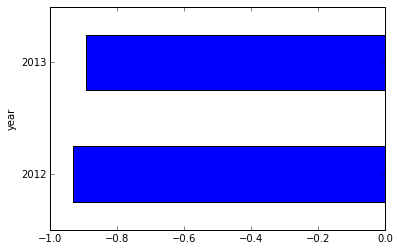

In [199]:
#PL by Year
df['year'] = pd.DatetimeIndex(df['open_date']).year
ave_pl_by_yr = df.groupby(df['year']).gross_pl.mean().plot(kind="barh")

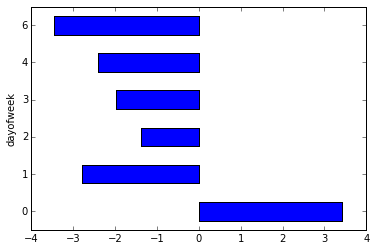

In [200]:
#PL by Weekday
#df['day'] = pd.DatetimeIndex(df['open_date']).day
df['dayofweek'] = pd.DatetimeIndex(df['open_date']).dayofweek
ave_pl_by_wkday = df.groupby(df['dayofweek']).gross_pl.mean().plot(kind="barh")

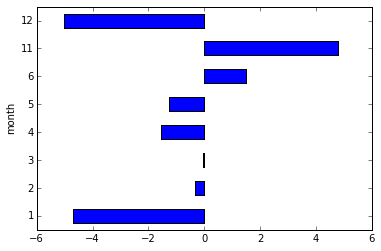

In [201]:
#PL by Month
df['month'] = pd.DatetimeIndex(df['open_date']).month
ave_pl_by_month = df.groupby(df['month']).gross_pl.mean().plot(kind="barh")

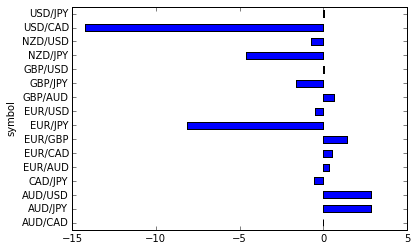

In [202]:
#PL by Pair
ave_pl_by_symbol = df.groupby(['symbol']).gross_pl.mean().plot(kind="barh")